In [1]:
%pip install tensorflow opencv-python matplotlib kagglehub pandas tensorflow_hub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shreelakshmigp/cedardataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Satgu\.cache\kagglehub\datasets\shreelakshmigp\cedardataset\versions\1


In [ ]:
import cv2
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow_hub as hub

Load Data

In [4]:
data = tf.keras.utils.image_dataset_from_directory(os.path.join(path, "signatures"), batch_size=128)

Found 2640 files belonging to 2 classes.


Pre Processing

In [5]:
data = data.map(lambda x,y: (x/255, y))

In [6]:
scaled_iterator = data.as_numpy_iterator()

In [7]:
batch = scaled_iterator.next()

In [8]:
batch[1].max()

np.int32(1)

TypeError: Invalid shape (3,) for image data

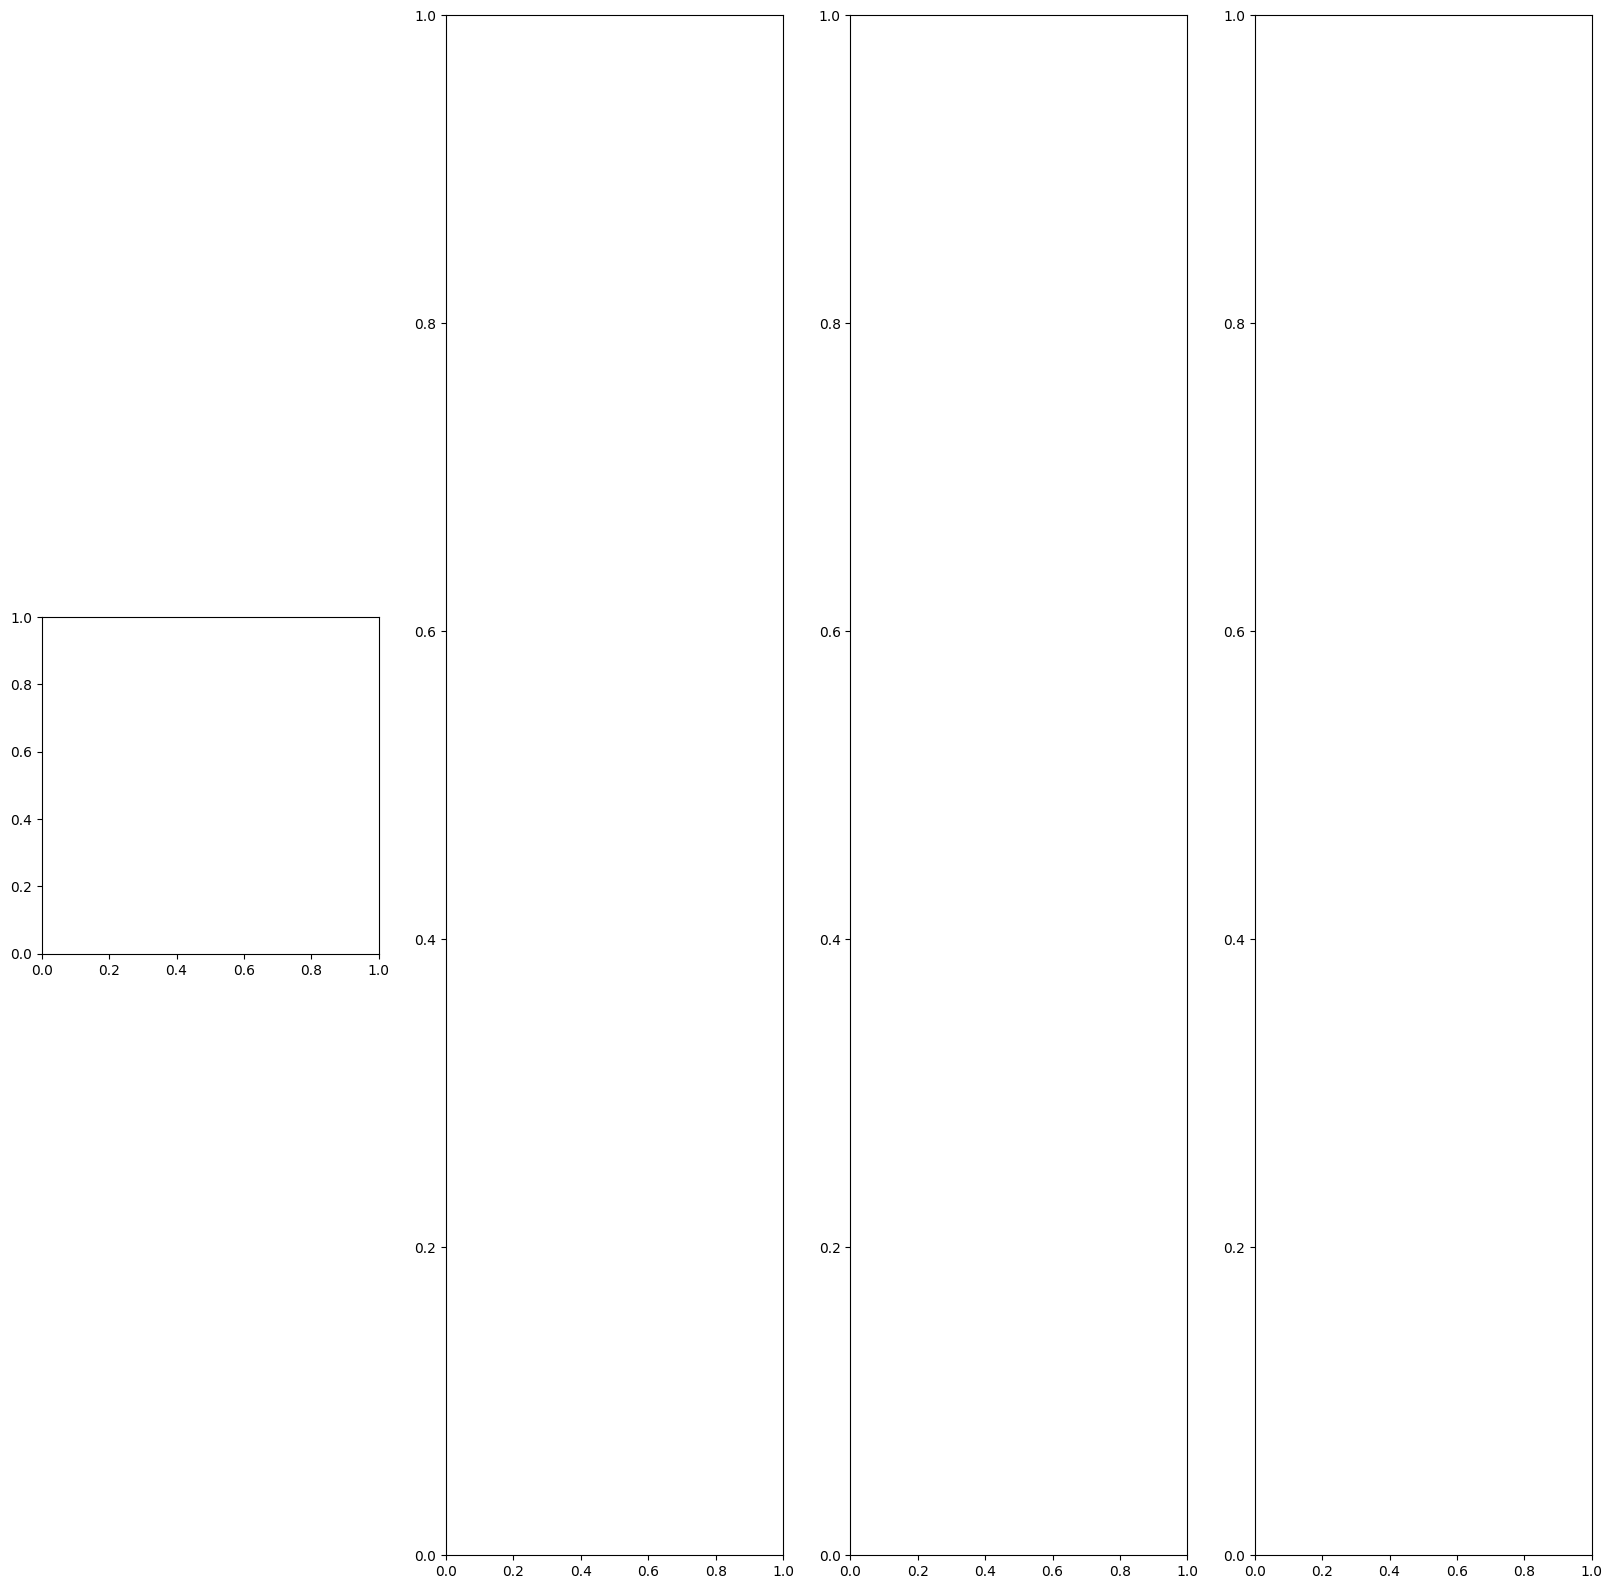

In [79]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    print(batch)

Test Train Split

In [10]:
len(data)

21

In [11]:
train_size = int(0.6*len(data))
test_size = int(0.3*len(data))
val_size = int(0.1*len(data))+1
print(train_size, test_size, val_size)

12 6 3


In [12]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Building the model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\Satgu\Documents\VS Code\2nd year\Forgery Classifier\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Train

In [18]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')

In [19]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks=[tensorboard_callback])

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.4956 - loss: 1.1661 - val_accuracy: 0.5000 - val_loss: 0.6983
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 995ms/step - accuracy: 0.4754 - loss: 0.6973 - val_accuracy: 0.5286 - val_loss: 0.6902
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5760 - loss: 0.6885 - val_accuracy: 0.4609 - val_loss: 0.7192
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 994ms/step - accuracy: 0.5944 - loss: 0.6709 - val_accuracy: 0.6615 - val_loss: 0.6196
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 993ms/step - accuracy: 0.7162 - loss: 0.5757 - val_accuracy: 0.7161 - val_loss: 0.6381
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.7024 - loss: 0.5864 - val_accuracy: 0.7057 - val_loss: 0.5623
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 971ms/step - accuracy: 0.7251 - loss: 0.5544 - val_accuracy: 0.6693 - val_loss: 0.6109
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.7289 - loss: 0.5916 - val_accuracy: 0.7031

In [20]:
hist.history

{'accuracy': [0.5026041865348816,
  0.4869791567325592,
  0.58984375,
  0.6484375,
  0.7063801884651184,
  0.7109375,
  0.7044270634651184,
  0.7180989384651184,
  0.740234375,
  0.76953125,
  0.771484375,
  0.7962239384651184,
  0.8274739384651184,
  0.8541666865348816,
  0.8541666865348816,
  0.8802083134651184,
  0.916015625,
  0.935546875,
  0.9283854365348816,
  0.9440104365348816],
 'loss': [0.9344266057014465,
  0.6947786211967468,
  0.683142364025116,
  0.6417720913887024,
  0.5856781601905823,
  0.5706165432929993,
  0.5830263495445251,
  0.5815765261650085,
  0.522808313369751,
  0.5007078051567078,
  0.47157201170921326,
  0.4339950382709503,
  0.39466604590415955,
  0.3513980209827423,
  0.34335681796073914,
  0.2827422320842743,
  0.23589015007019043,
  0.17283906042575836,
  0.21171455085277557,
  0.14877676963806152],
 'val_accuracy': [0.5,
  0.5286458134651184,
  0.4609375,
  0.6614583134651184,
  0.7161458134651184,
  0.7057291865348816,
  0.6692708134651184,
  0.70312

Plot Performance

<function matplotlib.pyplot.show(close=None, block=None)>

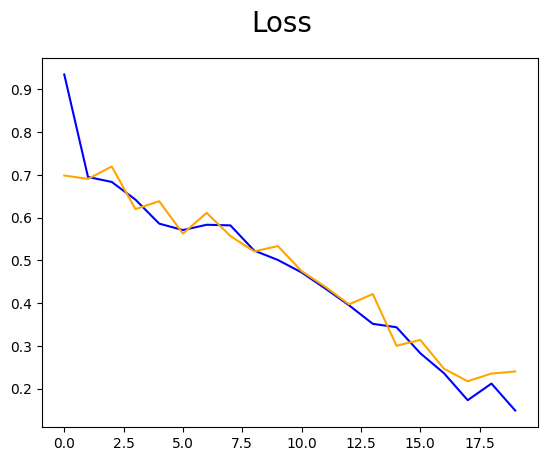

In [21]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.show

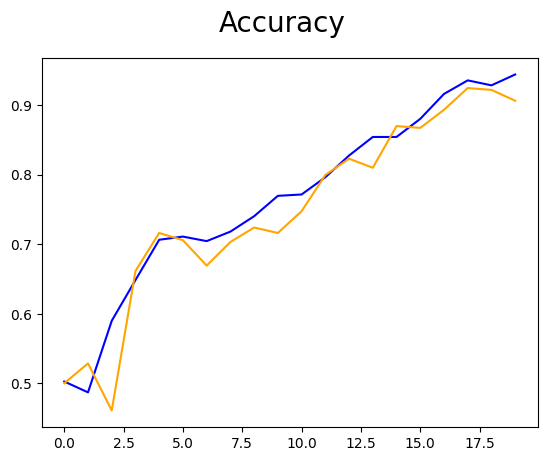

In [22]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.show()

Performance Evaluation

In [23]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [24]:
precision = Precision()
recall = Recall()
Baccuracy = BinaryAccuracy()

In [25]:
len(test)

6

In [26]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    Baccuracy.update_state(y, yhat)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


In [27]:
print("Precision: ", precision.result().numpy())
print("Recall: ", recall.result().numpy())
print("Accuracy: ", Baccuracy.result().numpy())

Precision:  0.9556962
Recall:  0.88046646
Accuracy:  0.9236111


Saving model

In [28]:
model.save(os.path.join('models', 'forgeryclassifier.keras'))

In [78]:
path = "Files/val_data"
val.save(path)

Using the Model

In [29]:
from tensorflow.keras.models import load_model
import os

In [30]:
loaded_model = load_model(os.path.join('models', 'forgeryclassifier.keras'))

In [31]:
forged_example = cv2.imread('forgeries_1_14.png')
forged_example = tf.image.resize(forged_example, (256, 256))
loaded_model.predict(np.expand_dims(forged_example/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


array([[0.3458477]], dtype=float32)

In [32]:
original_example = cv2.imread('original_3_6.png')
original_example = tf.image.resize(original_example, (256, 256))
loaded_model.predict(np.expand_dims(original_example/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[0.89267755]], dtype=float32)

Testing against NST Forgeries

In [80]:
import tensorflow as tf
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
import os

In [81]:
path = "Files/forged_data"

NSTdata = tf.data.Dataset.load(path)

In [82]:
precision = Precision()
recall = Recall()
Baccuracy = BinaryAccuracy()

In [83]:

for X in NSTdata:
    y = 1
    yhat = model.predict(X)
    print(yhat)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    Baccuracy.update_state(y, yhat)

c:\Users\Satgu\Documents\VS Code\2nd year\Forgery Classifier\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(32, 256, 256, 3))', 'Tensor(shape=(32,))')
  warnings.warn(msg)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step
[[1.1383074e-03]
 [9.6292734e-01]
 [9.8902684e-01]
 [9.9957395e-01]
 [2.3402399e-01]
 [2.2101676e-02]
 [2.0941695e-02]
 [3.4207723e-01]
 [1.8843831e-04]
 [8.6371261e-01]
 [9.6653646e-01]
 [1.8178726e-02]
 [9.5229518e-01]
 [7.9504745e-03]
 [8.4056979e-01]
 [4.0202285e-03]
 [7.0006669e-02]
 [5.8803945e-03]
 [5.6626450e-02]
 [2.4812855e-01]
 [1.7997991e-01]
 [2.1352140e-02]
 [1.8645929e-02]
 [7.6140559e-01]
 [4.9986417e-04]
 [1.6925566e-02]
 [3.4078461e-01]
 [1.8437605e-01]
 [5.1652366e-01]
 [9.9946958e-01]
 [1.1732873e-01]
 [1.9782159e-02]
 [9.4537681e-01]
 [2.0131423e-05]
 [8.2138516e-02]
 [2.9097462e-01]
 [5.0481834e-02]
 [9.4168341e-01]
 [1.0000000e+00]
 [2.8459129e-01]
 [8.2143955e-02]
 [4.5664185e-03]
 [9.7386962e-01]
 [4.7401145e-02]
 [6.6811596e-03]
 [6.3266456e-03]
 [3.2104975e-01]
 [9.9947947e-01]
 [9.9629980e-01]
 [2.3853017e-01]
 [2.7871154e-02]
 [9.6376979e-01]
 [5.5426371e-01]
 [2.2466682e-01]
 [1.9623579e-01]
 [9.9602538e-01]
 [2.017495

In [84]:
print("Precision: ", precision.result().numpy())
print("Recall: ", recall.result().numpy())
print("Accuracy: ", Baccuracy.result().numpy())

Precision:  1.0
Recall:  0.4453125
Accuracy:  0.4453125
